# K-Means Clustering

## Importing the libraries

In [25]:
import numpy as np #to process arrays as inputs. "as np" to make a shortcut call in case we want to use numpy
import matplotlib.pyplot as plt #to plot charts. "." to use specific module pyplot and "plt" as shortcut
import pandas as pd #import data set and matrices. "pd" -> shortcut

## Importing the dataset

In [26]:
dataset = pd.read_csv('Mall_Customers.csv')

X = dataset.iloc[:, [3, 4]].values #vamos selecionar somente a 3 e 4 coluna (anual income e spending score)
#Como queremos identificar patterns para dividir em clusters, normalmente chamamos o dataset inteiro:
# X = dataset.iloc[:, :].values
#(pois não há variável dependente)

#Qual a coluna que não tem impacto nas características que queremos descobrir?
#O CustomerID! -> Porque é somente identificação.

#NOTA - Não há Y porque não existe variável dependente.

## Using the elbow method to find the optimal number of clusters

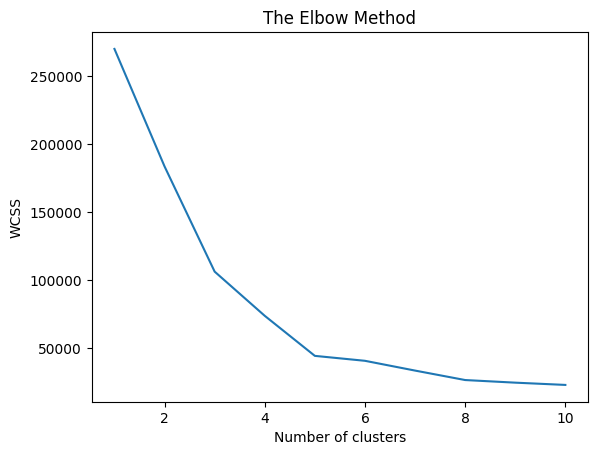

In [27]:
from sklearn.cluster import KMeans
#Vamos correr o algoritmo de kmeans de 1 a 10 clusters. Depois descobrimos qual o ótimo
wcss  = [] #within cluster sum of squares
for i in range(1, 11): #10 vezes
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) #para fazer i clusters, usar o k-means++ (e nao ser random)
    kmeans.fit(X) #treinar o algoritmo -> fit. Com os dados!
    wcss.append(kmeans.inertia_) #append para ir agregando na matriz vazia criada anteriormente
plt.plot(range(1, 11), wcss) #grafico com x de 1 a 10
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Denota-se que a partir de 5 o WCSS diminui pouco... portanto 5 é o número ótimo de clusters!

## Training the K-Means model on the dataset

In [28]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42) #como número otimo foi cinco, vamos treinar com cinco clusters.
y_kmeans = kmeans.fit_predict(X) #treina e retorna a variavel dependente que queremos criar (corresponde aos grupos de clusters criados)

In [29]:
print(y_kmeans) #diz os clusters em que cada cliente ira pertencer.

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


## Visualising the clusters

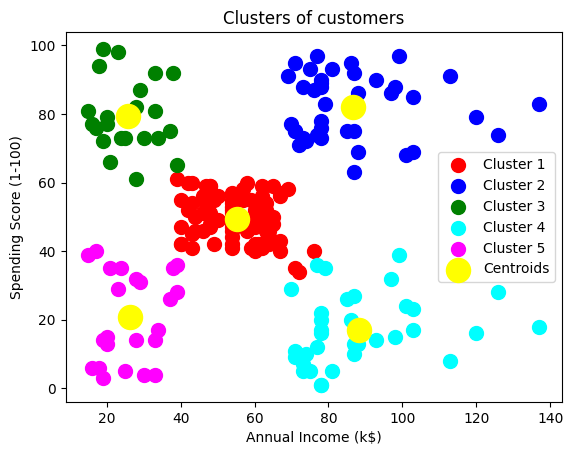

In [30]:
#scatter dos cinco clusters, com size igual e cores diferentes
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1') # y_kmeans == 0 -> primeiro cluster. 0 e 1 são a coluna annual income e spending score
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids') #scatter dos centroides
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
